In [78]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
%matplotlib inline

In [79]:
gld = pdr.get_data_yahoo('GLD', '2018-05-18')
gld.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-05-17,122.430000,122.040001,122.230003,122.360001,7781300,122.360001
2018-05-18,122.650002,122.010002,122.050003,122.410004,6837100,122.410004
2018-05-21,122.529999,121.970001,122.160004,122.480003,4126700,122.480003
2018-05-22,122.739998,122.339996,122.699997,122.410004,4579600,122.410004
2018-05-23,122.739998,122.110001,122.139999,122.540001,6974600,122.540001


In [80]:
gld_close = pd.DataFrame(gld.Close)

In [81]:
gld_close['MA_9'] = gld_close.Close.rolling(9).mean().shift()
gld_close['MA_21'] = gld_close.Close.rolling(21, center=True).mean()

In [82]:
gld_close['MA_9'].head(12)

Date
2018-05-17           NaN
2018-05-18           NaN
2018-05-21           NaN
2018-05-22           NaN
2018-05-23           NaN
2018-05-24           NaN
2018-05-25           NaN
2018-05-29           NaN
2018-05-30           NaN
2018-05-31    122.840001
2018-06-01    122.922223
2018-06-04    122.931112
Name: MA_9, dtype: float64

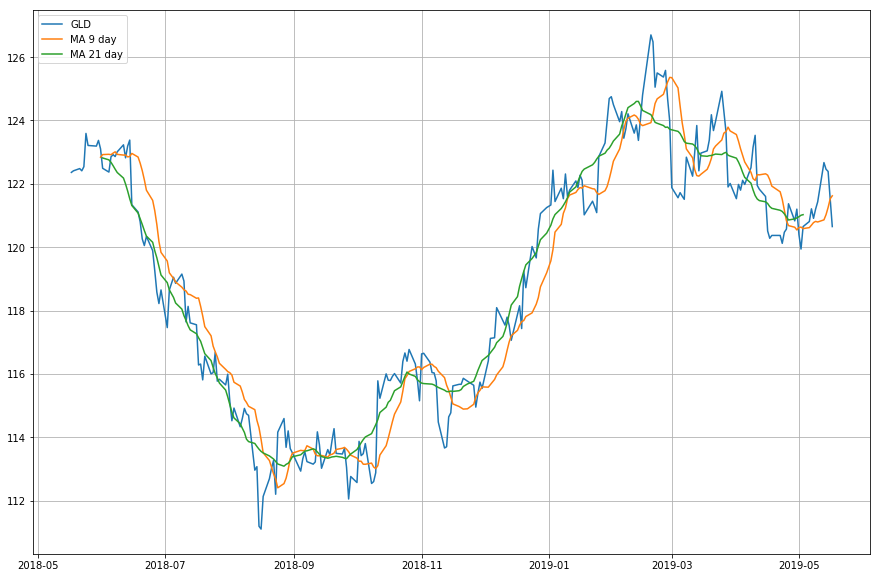

In [83]:
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(gld_close['Close'], label='GLD')
plt.plot(gld_close['MA_9'], label = 'MA 9 day')
plt.plot(gld_close['MA_21'], label = 'MA 21 day')
plt.legend(loc=2)

In [84]:
gld_close["change"] = np.log(gld_close["Close"] / gld_close["Close"].shift())

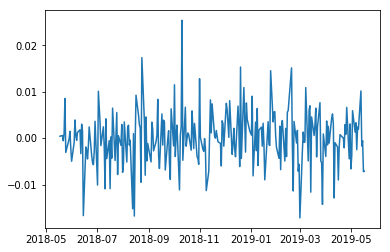

In [85]:
plt.plot(gld_close.change)

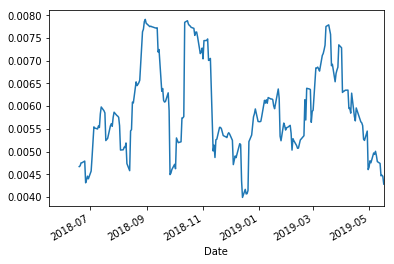

In [86]:
gld_close['Volatility'] = gld_close.change.rolling(21).std().shift()
gld_close['Volatility'].plot()

In [87]:
gld_close['exp_chng'] = gld_close['Volatility'] * gld_close['Close'].shift()
gld_close['actual_chng'] = gld_close['Close'] - gld_close['Close'].shift()

In [88]:
gld_close = pd.DataFrame(gld_close.iloc[22:])

In [89]:
gld_close['Magnitude'] = gld_close['actual_chng'] / gld_close['exp_chng'] 

In [90]:
gld_close['abs_magni'] = np.abs(gld_close['Magnitude'])
gld_close.head()

,Close,MA_9,MA_21,change,Volatility,exp_chng,actual_chng,Magnitude,abs_magni
Date,,,,,,,,,
2018-06-19,120.800003,122.651111,120.898572,-0.002563,0.004672,0.565776,-0.309998,-0.547916,0.547916
2018-06-20,120.260002,122.415556,120.717620,-0.004480,0.004688,0.566313,-0.540001,-0.953539,0.953539
2018-06-21,120.050003,122.126667,120.524287,-0.001748,0.004752,0.571526,-0.209999,-0.367436,0.367436
2018-06-22,120.339996,121.797779,120.347620,0.002413,0.004756,0.570915,0.289993,0.507944,0.507944
2018-06-25,119.889999,121.476667,120.153334,-0.003746,0.004793,0.576777,-0.449997,-0.780193,0.780193


(array([ 1.,  1.,  1.,  0.,  0.,  0.,  0.,  4.,  3.,  1.,  3.,  5.,  6.,
         4.,  6.,  9., 12., 10., 11., 21., 12., 18., 12., 13., 21., 15.,
         8.,  3.,  6.,  5.,  3.,  4.,  2.,  1.,  2.,  1.,  0.,  1.,  1.,
         2.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([-3.29232485, -3.13745449, -2.98258413, -2.82771378, -2.67284342,
        -2.51797306, -2.3631027 , -2.20823235, -2.05336199, -1.89849163,
        -1.74362127, -1.58875092, -1.43388056, -1.2790102 , -1.12413984,
        -0.96926949, -0.81439913, -0.65952877, -0.50465841, -0.34978806,
        -0.1949177 , -0.04004734,  0.11482302,  0.26969337,  0.42456373,
         0.57943409,  0.73430445,  0.8891748 ,  1.04404516,  1.19891552,
         1.35378588,  1.50865623,  1.66352659,  1.81839695,  1.97326731,
         2.12813766,  2.28300802,  2.43787838,  2.59274874,  2.74761909,
         2.90248945,  3.05735981,  3.21223017,  3.36710052,  3.52197088,
         3.67684124,  3.8317116 ,  3.98658195,  4.14145231,

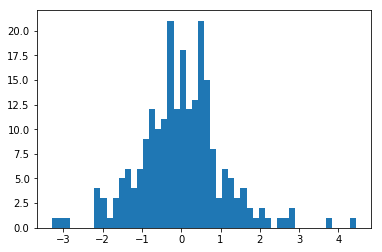

In [91]:
plt.hist(gld_close['Magnitude'], bins=50)

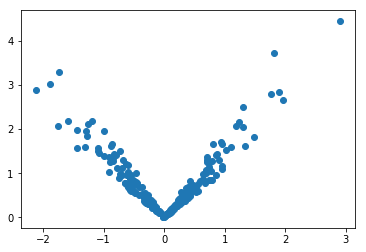

In [92]:
plt.scatter(gld_close['actual_chng'], gld_close['abs_magni'])